In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import graphviz

# Read lyrics

In [2]:
lyrics = pd.read_csv('lyrics.csv')
lyrics['hit'] = pd.read_csv('audio_features.csv')['hit'].values
lyrics.dropna(inplace=True)
lyrics

,name,artists,lyrics,hit
1,"10,000 Reasons (Bless The Lord) [Radio Version...",Matt Redman,"10,000 reasons for my heart to sing Bless the...",0.0
2,100 Proof,Kellie Pickler,Ain't no rain as cold as the look she just gav...,0.0
3,101,Alicia Keys,You used to the sound of a heart that's breaki...,0.0
4,1313,The Big Pink,"Convey your thoughts, translate them well Say ...",0.0
5,1961,The Fray,"Two brothers, 1961 On a road 90 miles too long...",0.0
...,...,...,...,...
20571,TALES OF DOMINICA,Lil Nas X,"Woke up on the floor Oh, this plastic bed don'...",1.0
20572,ONE OF ME (feat. Elton John),"Lil Nas X, Elton John","I like this, I don't like that Do this here, d...",1.0
20573,LOST IN THE CITADEL,Lil Nas X,"Tell me, are you feeling down? Are you happy, ...",1.0
20574,In Da Getto,"J Balvin, Skrillex",Party inna di ghetto Inna di ghetto Party in d...,1.0


# Vectorize data

In [3]:
# remove punctuations
#lyrics['lyrics'] = lyrics['lyrics'].str.replace('.', '').str.replace(',', '').str.replace('-', ' ').str.replace("'", '').str.replace('"', '').replace('?', '')

# tokenize lyrics
def tokenize(text): 
    # initialize tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    # remove stop words
    tokens = [token for token in tokens if (token not in stopwords.words('english')) and token.isalpha()]
    # initialize stemmer
    stemmer = SnowballStemmer('english')
    # semming all tokens
    stems = [stemmer.stem(token) for token in tokens] 
    return tokens, stems

tokenized = []
stemmed = []

for i in lyrics['lyrics']:
    tokens, stems = tokenize(i)
    tokenized.append(tokens)
    stemmed.append(stems)
    
lyrics['tokenized'] = [' '.join(i) for i in tokenized]
lyrics['stemmed'] = [' '.join(i) for i in stemmed]
lyrics

,name,artists,lyrics,hit,tokenized,stemmed
1,"10,000 Reasons (Bless The Lord) [Radio Version...",Matt Redman,"10,000 reasons for my heart to sing Bless the...",0.0,reasons heart sing bless lord soul soul worshi...,reason heart sing bless lord soul soul worship...
2,100 Proof,Kellie Pickler,Ain't no rain as cold as the look she just gav...,0.0,rain cold look gave everyone around us knows s...,rain cold look gave everyon around us know sto...
3,101,Alicia Keys,You used to the sound of a heart that's breaki...,0.0,used sound heart breaking know faze anymore ki...,use sound heart break know faze anymor king ga...
4,1313,The Big Pink,"Convey your thoughts, translate them well Say ...",0.0,convey thoughts translate well say words baite...,convey thought translat well say word bait bre...
5,1961,The Fray,"Two brothers, 1961 On a road 90 miles too long...",0.0,two brothers road miles long someone want us t...,two brother road mile long someon want us toge...
...,...,...,...,...,...,...
20571,TALES OF DOMINICA,Lil Nas X,"Woke up on the floor Oh, this plastic bed don'...",1.0,woke floor oh plastic bed blow broken home eve...,woke floor oh plastic bed blow broken home eve...
20572,ONE OF ME (feat. Elton John),"Lil Nas X, Elton John","I like this, I don't like that Do this here, d...",1.0,like like say one say one yeah yeah say one sa...,like like say one say one yeah yeah say one sa...
20573,LOST IN THE CITADEL,Lil Nas X,"Tell me, are you feeling down? Are you happy, ...",1.0,tell feeling happy dreams still seem inbound t...,tell feel happi dream still seem inbound tell ...
20574,In Da Getto,"J Balvin, Skrillex",Party inna di ghetto Inna di ghetto Party in d...,1.0,party inna di ghetto inna di ghetto party di g...,parti inna di ghetto inna di ghetto parti di g...


In [4]:
#lyrics.to_csv('lyrics_processed.csv')

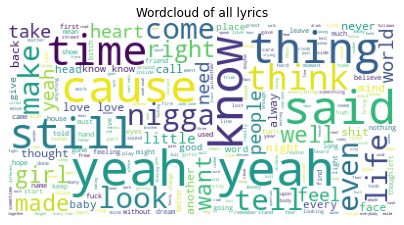

In [5]:
text = ' '.join([i for i in ' '.join(lyrics['tokenized']).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of all lyrics')
plt.show()

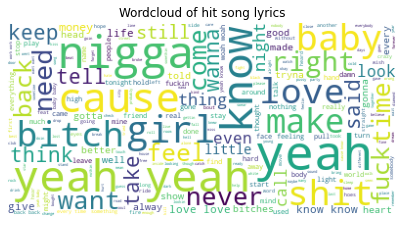

In [6]:
text_hit = ' '.join([i for i in ' '.join(lyrics.loc[lyrics['hit']==1,'tokenized']).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud_hit = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text_hit)
plt.imshow(wordcloud_hit)
plt.axis('off')
plt.title('Wordcloud of hit song lyrics')
plt.show()

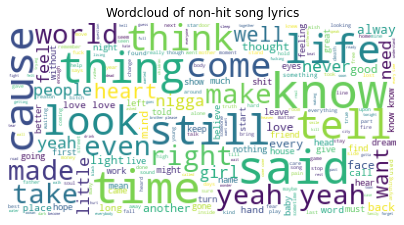

In [7]:
text_nonhit = ' '.join([i for i in ' '.join(lyrics.loc[lyrics['hit']==0,'tokenized']).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud_nonhit = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text_nonhit)
plt.imshow(wordcloud_nonhit)
plt.axis('off')
plt.title('Wordcloud of non-hit song lyrics')
plt.show()

In [8]:
cv = CountVectorizer(input='content', 
                     stop_words='english',
                     lowercase=True,
                     strip_accents='ascii',
                     max_features=500)
dtm = cv.fit_transform(lyrics['stemmed'])
df_cv = pd.DataFrame(dtm.toarray(),
                      columns=cv.get_feature_names())
df_cv = df_cv[[c for c in df_cv.columns if len(c)>3 and len(c)<11]]
df_cv.head()

,afraid,aliv,allah,alon,alreadi,alright,alway,angel,anoth,answer,...,wonder,word,work,world,worri,write,wrong,yeah,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
#df_cv.to_csv('LyricsCV.csv', index=False)

In [1]:
import pandas as pd
pd.read_csv('LyricsCV.csv')

,afraid,aliv,allah,alon,alreadi,alright,alway,angel,anoth,answer,...,wonder,word,work,world,worri,write,wrong,yeah,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20319,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20320,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,25,0,0
20321,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,3,0,0
20322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# DT of all lyrics

In [9]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_cv.drop, lyrics['hit'], test_size=0.2, random_state=42)
print('Train set dim:', X_train.shape)
print('Train set label counts:\n', y_train.value_counts())
print('Test set label counts:\n', y_test.value_counts())

Train set dim: (16259, 403)
Train set label counts:
 0.0    13677
1.0     2582
Name: hit, dtype: int64
Test set label counts:
 0.0    3389
1.0     676
Name: hit, dtype: int64


In [10]:
# hyperparameters tuning
param_grid = {'ccp_alpha':[0.000,0.005,0.01,0.02,0.03,0.05,0.1],
              'max_depth':range(3,15)}

clftree = DecisionTreeClassifier(random_state=42)
gridCV = GridSearchCV(clftree, param_grid, scoring='accuracy', cv=5).fit(X_train,y_train)
print('The best parameters are:', gridCV.best_params_)
print('Accuracy is:', gridCV.best_score_)

The best parameters are: {'ccp_alpha': 0.0, 'max_depth': 3}
Accuracy is: 0.8466082722961958


In [11]:
def accuracy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tp+tn)/(tn+fp+fn+tp)

def sensitivity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tp)/(tp+fn)

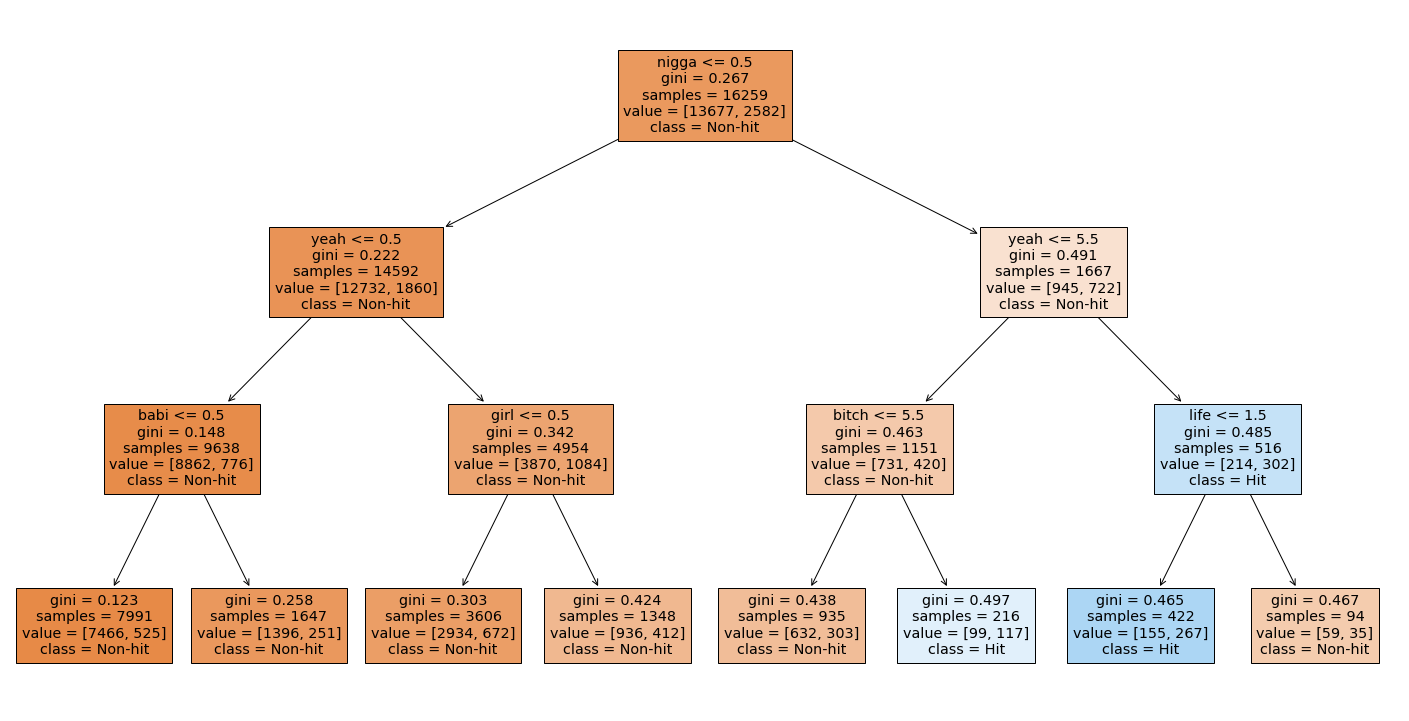

Accuracy is: 0.8386223862238622
Sensitivity is: 0.1390532544378698


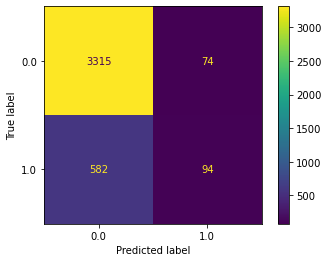

In [12]:
# decision tree for all lyrics with max_depth=3
dt1 = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=3, random_state=42)
dt1.fit(X_train, y_train)

fig = plt.subplots(figsize=(25,13))
plot_tree(dt1,
          feature_names=df_cv.columns.values,
          class_names=['Non-hit','Hit'],
          filled=True)
plt.show()

# predict
print('Accuracy is:', accuracy(y_test, dt1.predict(X_test)))
print('Sensitivity is:', sensitivity(y_test, dt1.predict(X_test)))
plot_confusion_matrix(dt1, X_test, y_test)

In [13]:
dt1_obj = tree.export_graphviz(dt1, out_file=None,
                      feature_names=df_cv.columns.values,  
                      class_names=['Non-hit','Hit'],
                      filled=True, rounded=True,  
                      special_characters=True)                                    
graph = graphviz.Source(dt1_obj) 
graph.format = 'png'   
#graph.render('DTPlot/dt_max_depth3') 

'DTPlot/dt_max_depth3.png'

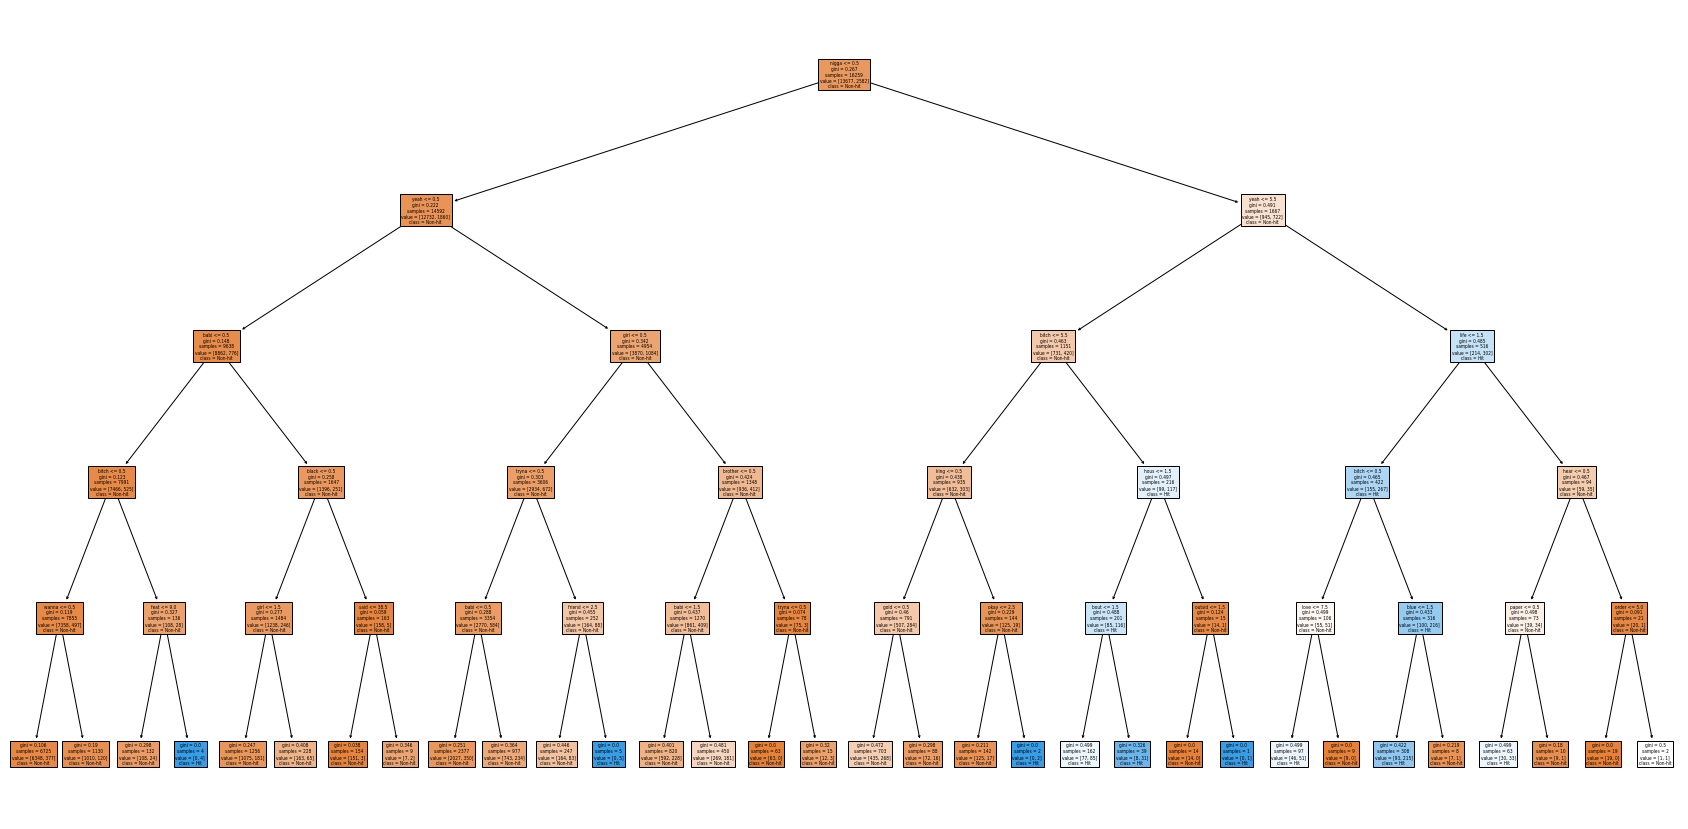

Accuracy is: 0.8376383763837638
Sensitivity is: 0.14201183431952663


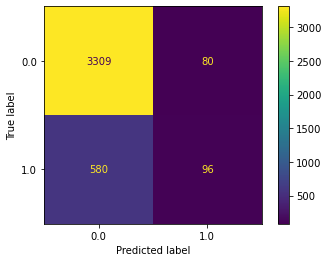

In [14]:
# decision tree for all lyrics with max_depth=5
dt2 = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, random_state=42)
dt2.fit(X_train, y_train)

fig = plt.subplots(figsize=(30,15))
plot_tree(dt2,
          feature_names=df_cv.columns.values,
          class_names=['Non-hit','Hit'],
          filled=True)
plt.show()

# predict
print('Accuracy is:', accuracy(y_test, dt2.predict(X_test)))
print('Sensitivity is:', sensitivity(y_test, dt2.predict(X_test)))
plot_confusion_matrix(dt2, X_test, y_test)

In [15]:
dt2_obj = tree.export_graphviz(dt2, out_file=None,
                      feature_names=df_cv.columns.values,  
                      class_names=['Non-hit','Hit'],
                      filled=True, rounded=True,  
                      special_characters=True)                                    
graph = graphviz.Source(dt2_obj) 
graph.format = 'png'
#graph.render('DTPlot/dt_max_depth5') 

'DTPlot/dt_max_depth5.png'

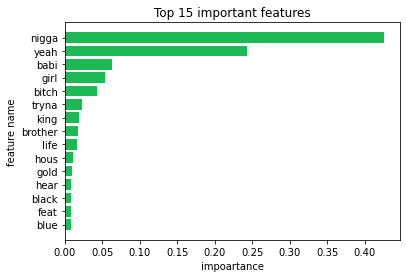

In [100]:
def featureImportance(tree, feature_names):
    imp = pd.DataFrame(tree.feature_importances_, index=feature_names).sort_values(0,ascending=True).tail(15)
    plt.barh(imp.index, imp[0], color='#1DB954')
    plt.xlabel('impoartance')
    plt.ylabel('feature name')
    plt.title('Top 15 important features')
    plt.show()
    
featureImportance(dt2, df_cv.columns)

# DT by genres

In [16]:
genres = pd.read_csv('audio_features_w_genre.csv').iloc[lyrics.index.values, -2]
genres.value_counts()[:20]

dance pop               2539
contemporary country    2009
alternative metal       1218
alternative dance        628
alternative rock         597
art pop                  497
album rock               412
modern rock              382
pop                      381
atl hip hop              364
hip hop                  332
ccm                      255
britpop                  250
acoustic pop             217
alternative country      206
conscious hip hop        195
canadian pop             190
alternative r&b          188
chicago rap              177
boy band                 175
Name: artist_genres, dtype: int64

In [17]:
df_genres_cv = df_cv.copy()
df_genres_cv['genres'] = genres.values
df_genres_cv.head()

,afraid,aliv,allah,alon,alreadi,alright,alway,angel,anoth,answer,...,word,work,world,worri,write,wrong,yeah,year,young,genres
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ccm
1,0,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,1,0,0,contemporary country
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,hip pop
3,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,1,0,dance rock
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,neo mellow


## Pop

In [18]:
pop = df_genres_cv.loc[df_genres_cv['genres'].str.contains('pop', na=False)]
pop = pop.loc[~pop['genres'].str.contains('hip pop')].drop(columns=['genres'])
pop.shape

(5569, 403)

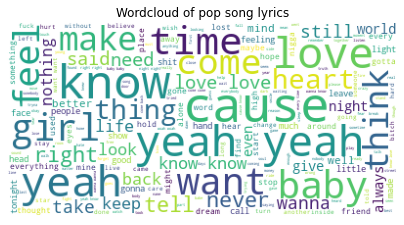

In [19]:
text_pop = ' '.join([i for i in ' '.join(lyrics.iloc[pop.index,4]).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud_pop = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text_pop)
plt.imshow(wordcloud_pop)
plt.axis('off')
plt.title('Wordcloud of pop song lyrics')
plt.show()

In [20]:
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(pop,
                                                                    lyrics.iloc[pop.index,3],
                                                                    test_size=0.2, random_state=42)
print('Train set dim:', X_train_pop.shape)
print('Train set label counts:\n', y_train_pop.value_counts())
print('Test set label counts:\n', y_test_pop.value_counts())

Train set dim: (4455, 403)
Train set label counts:
 0.0    3618
1.0     837
Name: hit, dtype: int64
Test set label counts:
 0.0    905
1.0    209
Name: hit, dtype: int64


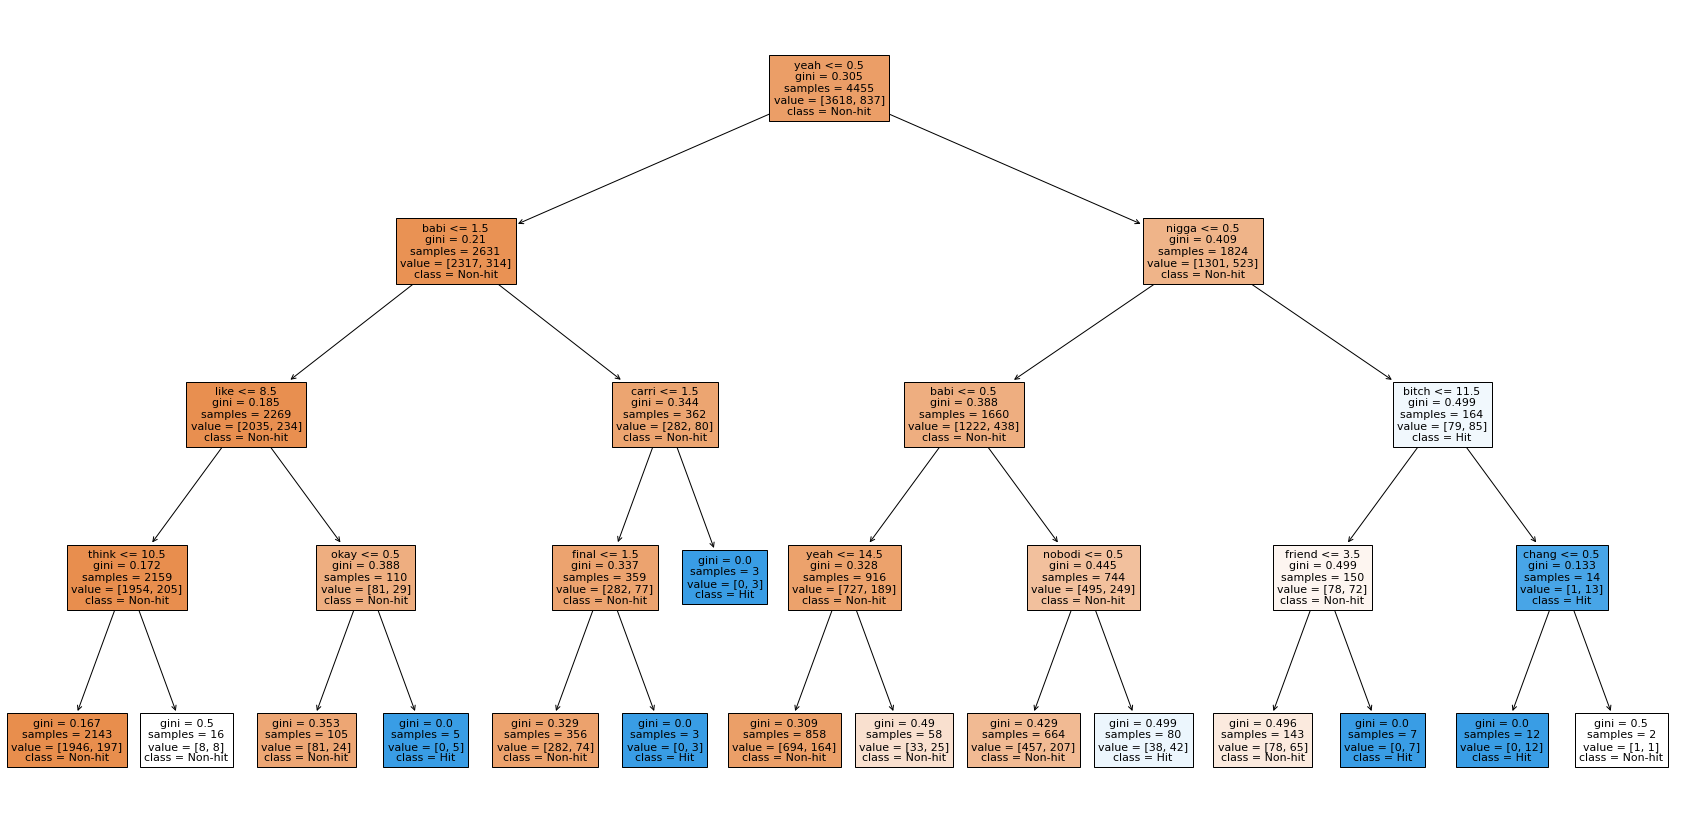

Accuracy is: 0.803411131059246
Sensitivity is: 0.04784688995215311


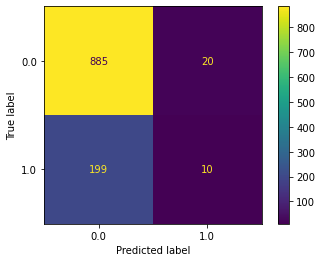

In [21]:
dt_pop = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=4 ,random_state=42)
dt_pop.fit(X_train_pop, y_train_pop)

fig = plt.subplots(figsize=(30,15))
plot_tree(dt_pop,
          feature_names=df_cv.columns.values,
          class_names=['Non-hit','Hit'],
          filled=True)
plt.show()

# predict
print('Accuracy is:', accuracy(y_test_pop, dt_pop.predict(X_test_pop)))
print('Sensitivity is:', sensitivity(y_test_pop, dt_pop.predict(X_test_pop)))
plot_confusion_matrix(dt_pop, X_test_pop, y_test_pop)

In [22]:
dt_pop_obj = tree.export_graphviz(dt_pop, out_file=None,
                      feature_names=df_cv.columns.values,  
                      class_names=['Non-hit','Hit'],
                      filled=True, rounded=True,  
                      special_characters=True)                                    
graph = graphviz.Source(dt_pop_obj) 
graph.format = 'png'
#graph.render('DTPlot/dt_pop')

'DTPlot/dt_pop.png'

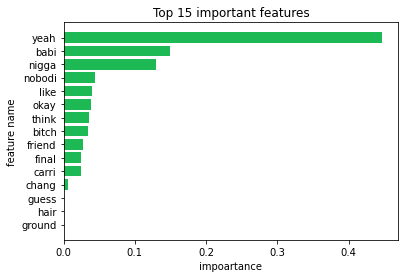

In [101]:
featureImportance(dt_pop, pop.columns)

## Country

(2554, 403)


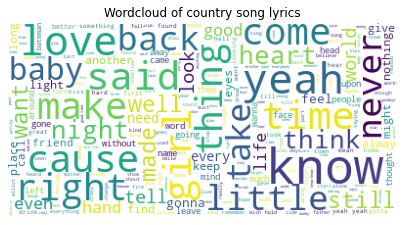

In [26]:
country = df_genres_cv.loc[df_genres_cv['genres'].str.contains('country', na=False)].drop(columns=['genres'])
print(country.shape)

text_country = ' '.join([i for i in ' '.join(lyrics.iloc[country.index,4]).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud_country = WordCloud(max_font_size=50, 
                      max_words=500, 
                      background_color='white').generate(text_country)
plt.imshow(wordcloud_country)
plt.axis('off')
plt.title('Wordcloud of country song lyrics')
plt.show()

In [27]:
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(country,
                                                                    lyrics.iloc[country.index,3],
                                                                    test_size=0.2, random_state=42)
print('Train set dim:', X_train_country.shape)
print('Train set label counts:\n', y_train_country.value_counts())
print('Test set label counts:\n', y_test_country.value_counts())

Train set dim: (2043, 403)
Train set label counts:
 0.0    1568
1.0     475
Name: hit, dtype: int64
Test set label counts:
 0.0    378
1.0    133
Name: hit, dtype: int64


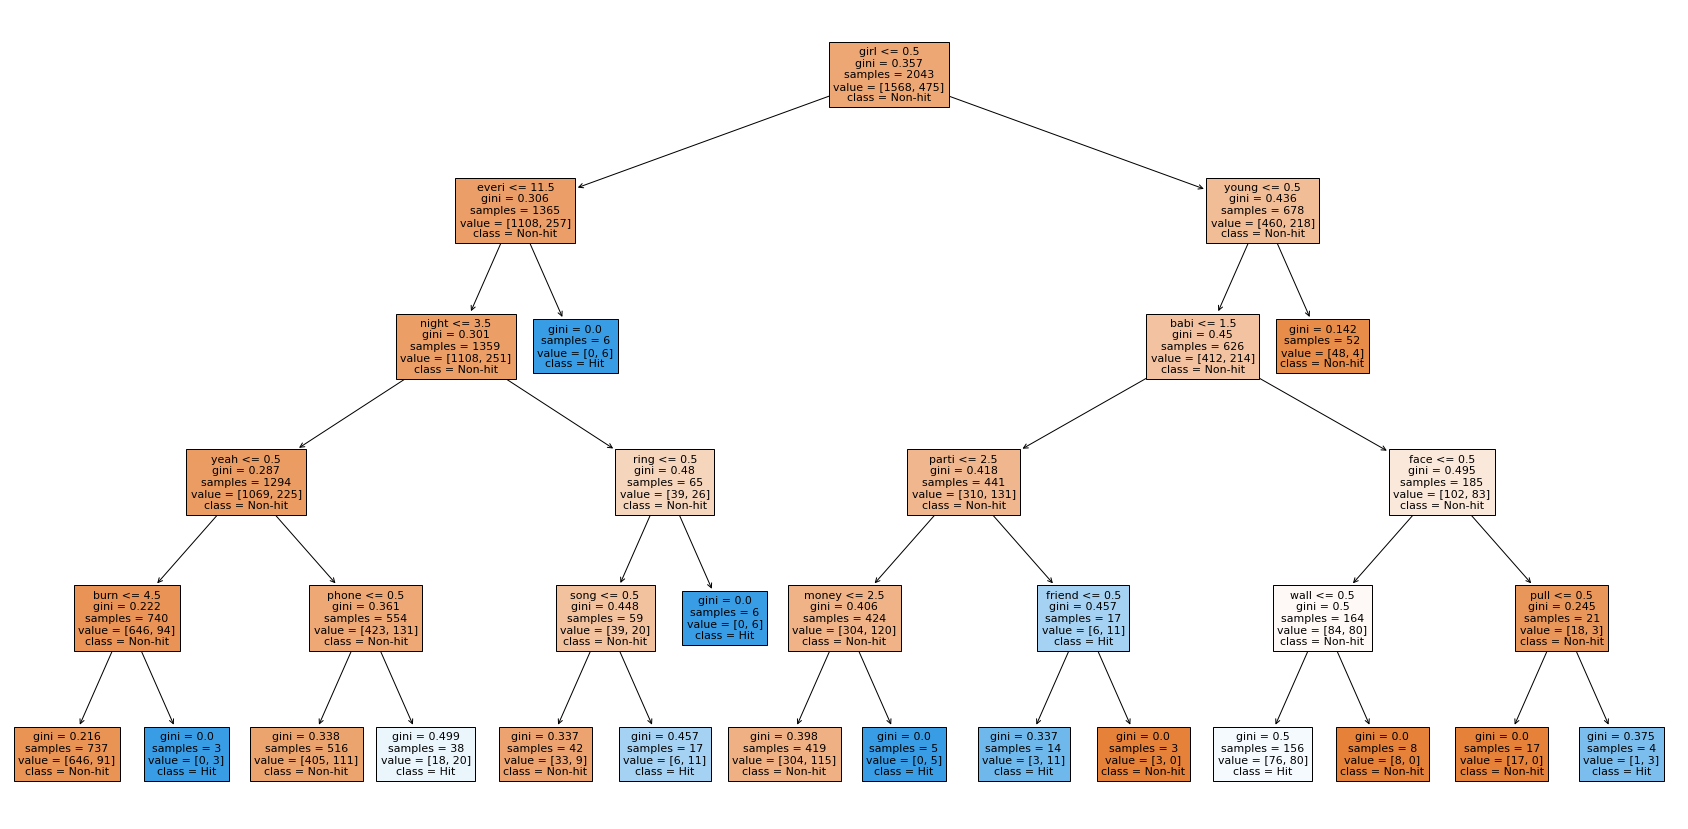

Accuracy is: 0.7475538160469667
Sensitivity is: 0.06766917293233082


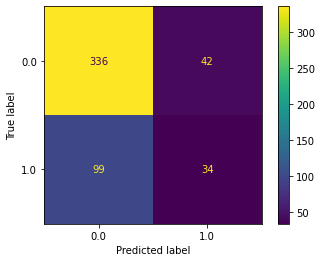

In [33]:
dt_country = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5 ,random_state=42)
dt_country.fit(X_train_country, y_train_country)

fig = plt.subplots(figsize=(30,15))
plot_tree(dt_country,
          feature_names=df_cv.columns.values,
          class_names=['Non-hit','Hit'],
          filled=True)
plt.show()

# predict
print('Accuracy is:', accuracy(y_test_country, dt_pop.predict(X_test_country)))
print('Sensitivity is:', sensitivity(y_test_country, dt_pop.predict(X_test_country)))
plot_confusion_matrix(dt_country, X_test_country, y_test_country)

In [34]:
dt_country_obj = tree.export_graphviz(dt_country, out_file=None,
                      feature_names=df_cv.columns.values,  
                      class_names=['Non-hit','Hit'],
                      filled=True, rounded=True,  
                      special_characters=True)                                    
graph = graphviz.Source(dt_country_obj) 
graph.format = 'png'
#graph.render('DTPlot/dt_country')

'DTPlot/dt_country.png'

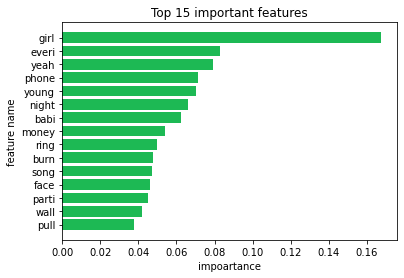

In [102]:
featureImportance(dt_country, country.columns)

## Hip hop

(1682, 403)


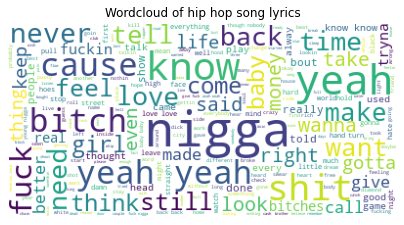

In [47]:
hh = df_genres_cv.loc[df_genres_cv['genres'].str.contains('hip hop|hip pop', na=False)].drop(columns=['genres'])
print(hh.shape)

text_hh = ' '.join([i for i in ' '.join(lyrics.iloc[hh.index,4]).split() if len(i)>3 and len(i)<11])

plt.figure(figsize=(7,7))
wordcloud_hh = WordCloud(max_font_size=50, 
                         max_words=500, 
                         background_color='white').generate(text_hh)
plt.imshow(wordcloud_hh)
plt.axis('off')
plt.title('Wordcloud of hip hop song lyrics')
plt.show()

In [48]:
X_train_hh, X_test_hh, y_train_hh, y_test_hh = train_test_split(hh,
                                                                    lyrics.iloc[hh.index,3],
                                                                    test_size=0.2, random_state=42)
print('Train set dim:', X_train_hh.shape)
print('Train set label counts:\n', y_train_hh.value_counts())
print('Test set label counts:\n', y_test_hh.value_counts())

Train set dim: (1345, 403)
Train set label counts:
 0.0    802
1.0    543
Name: hit, dtype: int64
Test set label counts:
 0.0    221
1.0    116
Name: hit, dtype: int64


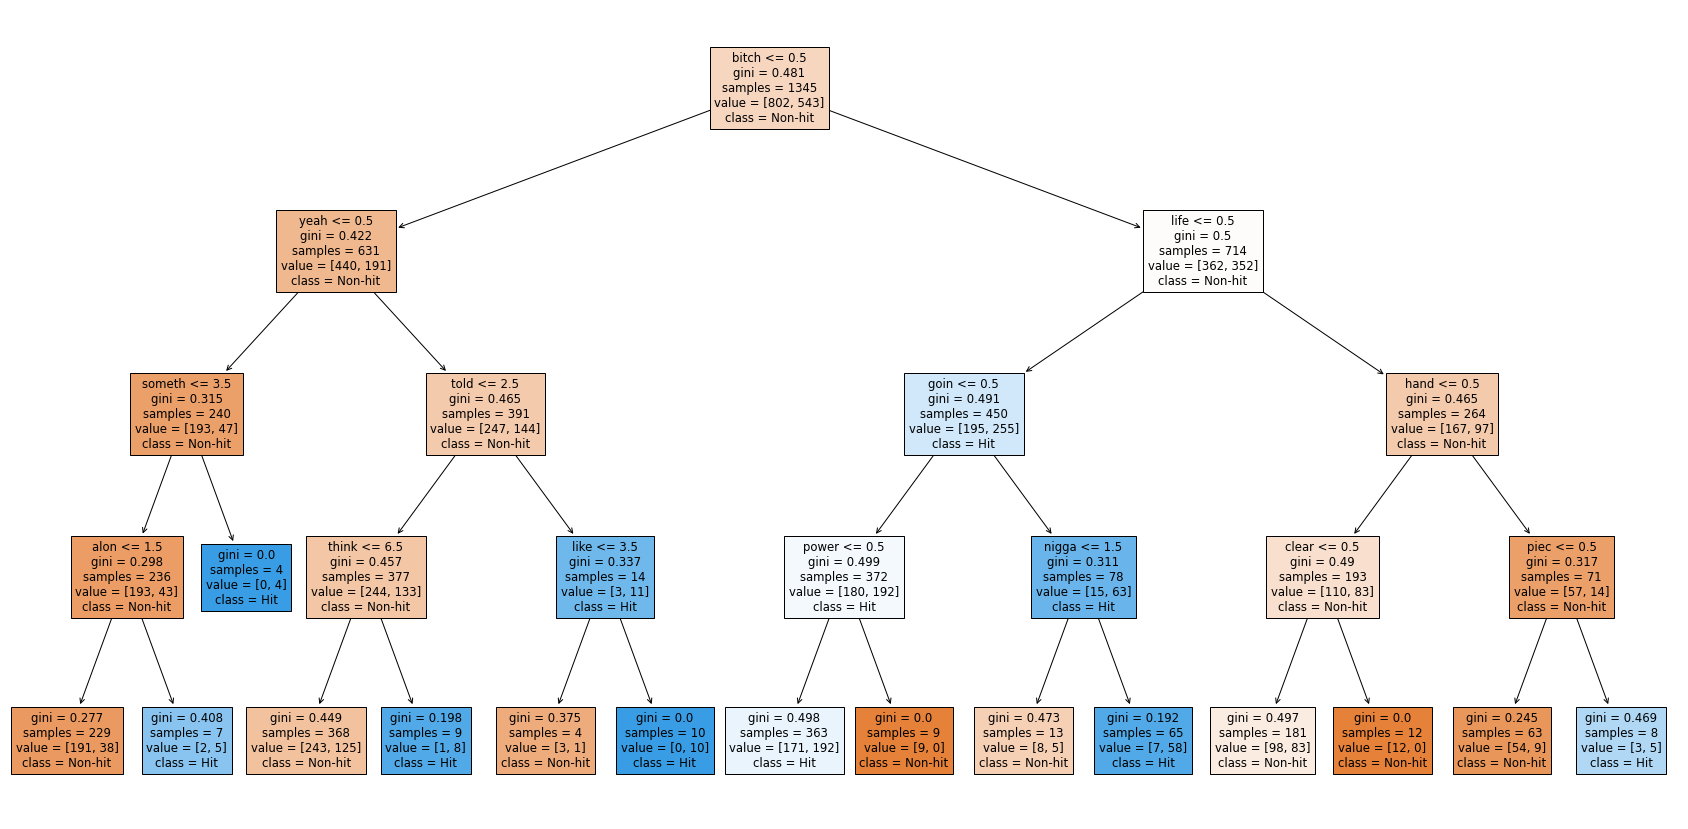

Accuracy is: 0.6468842729970327
Sensitivity is: 0.08620689655172414


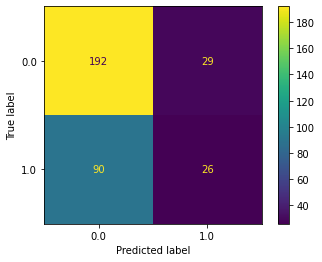

In [63]:
dt_hh = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4 ,random_state=42)
dt_hh.fit(X_train_hh, y_train_hh)

fig = plt.subplots(figsize=(30,15))
plot_tree(dt_hh,
          feature_names=df_cv.columns.values,
          class_names=['Non-hit','Hit'],
          filled=True)
plt.show()

# predict
print('Accuracy is:', accuracy(y_test_hh, dt_pop.predict(X_test_hh)))
print('Sensitivity is:', sensitivity(y_test_hh, dt_pop.predict(X_test_hh)))
plot_confusion_matrix(dt_country, X_test_hh, y_test_hh)

In [64]:
dt_hh_obj = tree.export_graphviz(dt_hh, out_file=None,
                      feature_names=df_cv.columns.values,  
                      class_names=['Non-hit','Hit'],
                      filled=True, rounded=True,  
                      special_characters=True)                                    
graph = graphviz.Source(dt_hh_obj) 
graph.format = 'png'
#graph.render('DTPlot/dt_hh')

'DTPlot/dt_hh.png'

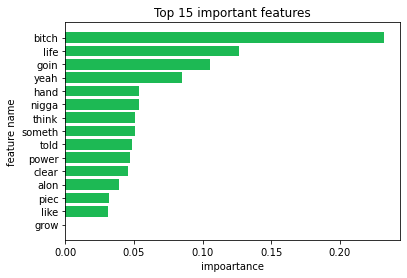

In [103]:
featureImportance(dt_hh, hh.columns)

# Random forest

Accuracy is: 0.8410824108241083
Sensitivity is: 0.08136094674556213


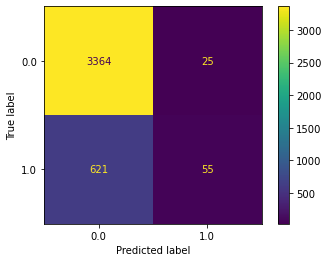

In [89]:
rf = RandomForestClassifier(ccp_alpha=0.0, max_depth=15 ,random_state=42)
rf.fit(X_train, y_train)

# predict
print('Accuracy is:', accuracy(y_test, rf.predict(X_test)))
print('Sensitivity is:', sensitivity(y_test, rf.predict(X_test)))
plot_confusion_matrix(rf, X_test, y_test)

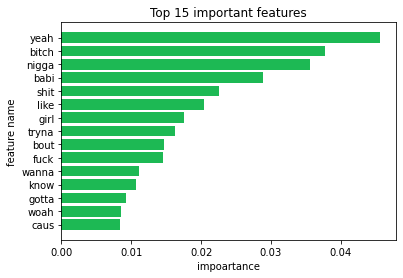

In [104]:
featureImportance(rf, df_cv.columns)

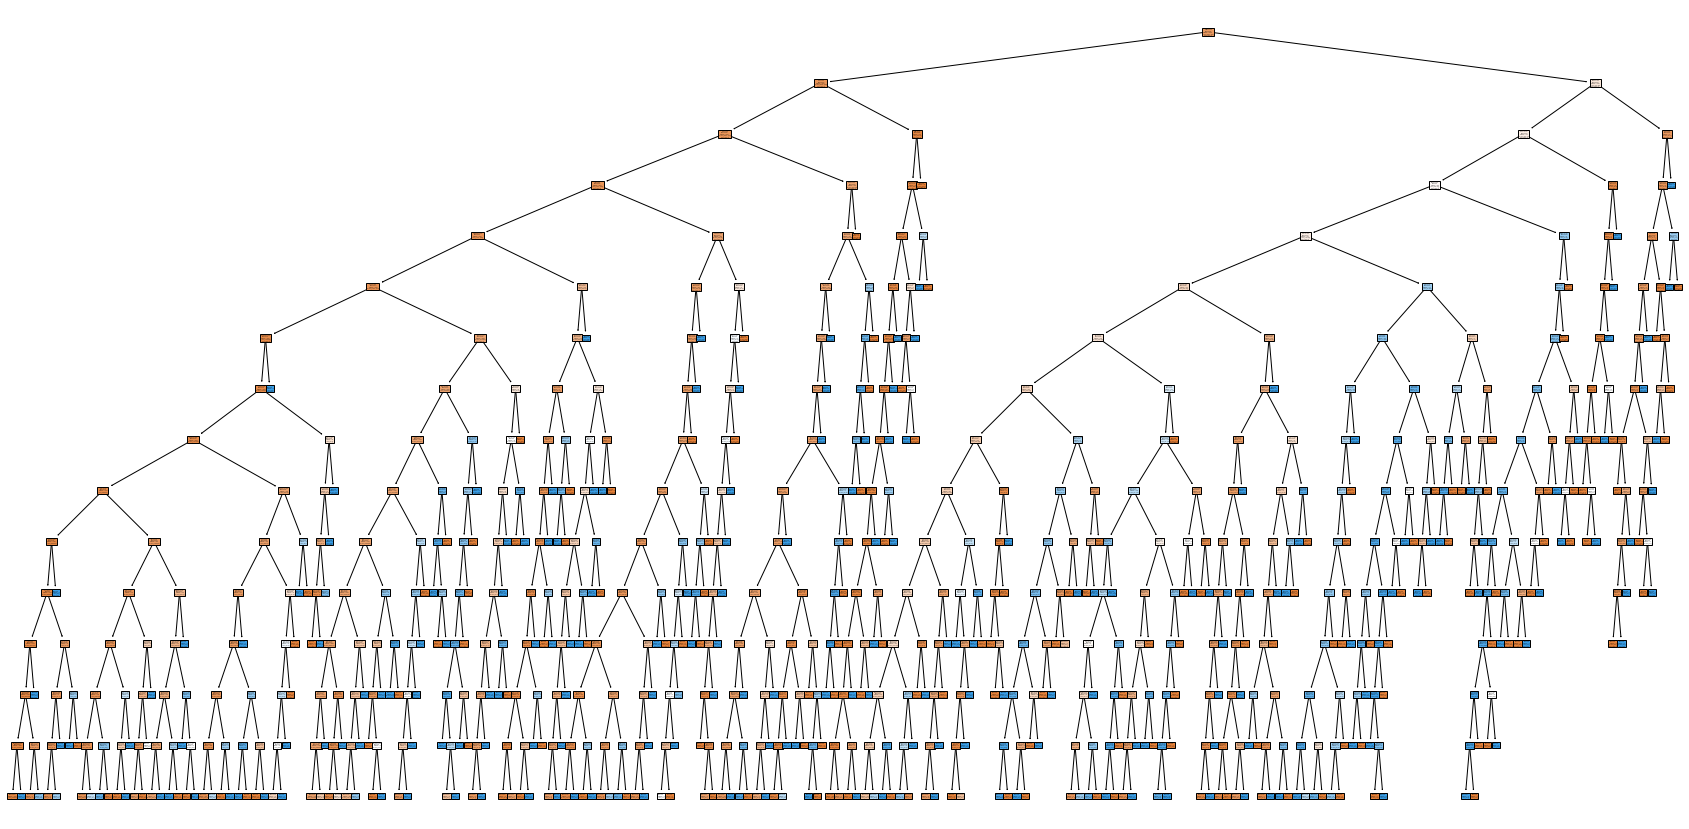

In [97]:
fig = plt.subplots(figsize=(30,15))
plot_tree(rf.estimators_[0],
          feature_names=df_cv.columns.values,  
          class_names=['Non-hit','Hit'],
          filled=True)
plt.show()

Accuracy is: 0.8179581795817958
Sensitivity is: 0.23816568047337278


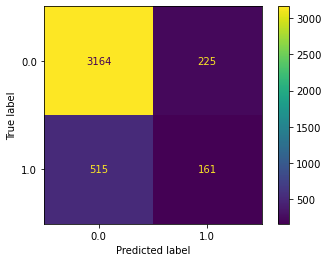

In [90]:
dt3 = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=15, random_state=42)
dt3.fit(X_train, y_train)

# predict
print('Accuracy is:', accuracy(y_test, dt3.predict(X_test)))
print('Sensitivity is:', sensitivity(y_test, dt3.predict(X_test)))
plot_confusion_matrix(dt3, X_test, y_test)

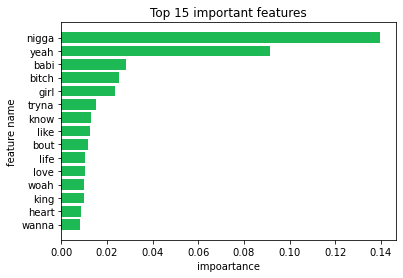

In [105]:
featureImportance(dt3, df_cv.columns)